This notebook illustrates the WEST pulses made the 27/11/2018, during the dedictated ICRH coupling experiments (2nd day)

# Q1 and Q2 antenna position scan

Up to this experiment, Q1 always show a higher coupling resistance than Q2. The goal of the experiment was to determine the optimal radial gap to locate Q1 and Q2 in order that they have the same coupling resistance.   
Reference pulses have same radial positions of Q1 and Q2, at R=3010 mm. Then Q2 is moved forward Q1 at 3003 mm then 2995mm (+15mm than Q1).  

In [1]:
# pulse numbers
pulses = [53772, 53773, # reference pulses, Q1 and Q2@3010mm
         53774, 53775, # Q2@3003 mm 
         53777 ] # Q2@2995 mm

In [2]:
%matplotlib notebook
%pylab
import pywed as pw

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
signames = {'Ptot': 'SICHPTOT', 
            'P_Q1': 'SICHPQ1', 'P_Q2': 'SICHPQ2', 'P_Q4': 'SICHPQ4',
            'Positions': 'EXP=T=S;Position;PosICRH', # use tsmat
            'P_Q1_left_fwd': 'GICHANTPOWQ1%1', # forward and reflecter powers
            'P_Q1_left_ref': 'GICHANTPOWQ1%2',
            'P_Q1_right_fwd': 'GICHANTPOWQ1%3', 
            'P_Q1_right_ref': 'GICHANTPOWQ1%4',
            'P_Q2_left_fwd': 'GICHANTPOWQ2%1', 
            'P_Q2_left_ref': 'GICHANTPOWQ2%2', 
            'P_Q2_right_fwd': 'GICHANTPOWQ2%3', 
            'P_Q2_right_ref': 'GICHANTPOWQ2%4',
            'Rc_Q1_left': 'GICHCOUPRES%1', # coupling resistances
            'Rc_Q1_right': 'GICHCOUPRES%2',
            'Rc_Q2_left': 'GICHCOUPRES%3',
            'Rc_Q2_right': 'GICHCOUPRES%4',            
            'Rc_Q4_left': 'GICHCOUPRES%5',
            'Rc_Q4_right': 'GICHCOUPRES%6',
           }
            

In [4]:
def get_signame(pulse, signame):
    y, t = pw.tsbase(pulse, signame, nargout=2)
    return y, t

In [5]:
from scipy.signal import savgol_filter
def smooth(y, window_length=51, polyorder=3):
    return savgol_filter(y, window_length, polyorder)

In [6]:
def filter_data(y, t, thres_min=0, thres_max=1e9, dt=0.2):
    " find and replace non-physical values by NaN "
    t2 = np.where(y > thres_min, t, np.NaN)
    y2 = np.where(y > thres_min, y, np.NaN)
    
    t2 = np.where(y < thres_max, t2, np.NaN)
    y2 = np.where(y < thres_max, y2, np.NaN)

    # remove NaN
    t2 = t2[np.isfinite(t2)]
    y2 = y2[np.isfinite(y2)]
    " find and replace data to tmin+dt and tmax-dt"
    #idx = np.where(~np.isnan(t2))
    #if np.any(idx):
    #    t2 = t2[np.where((t2 > t2[idx][0] + dt) & (t2 < t2[idx][-1] - dt))]
    #    y2 = y2[np.where((t2 > t2[idx][0] + dt) & (t2 < t2[idx][-1] - dt))]
    
    return y2, t2

def get_filtered_sig(pulse, signame, thres_min=0, thres_max=1e9, dt=0.2):
    y, t = get_signame(pulse, signame)
    y, t = filter_data(y, t, thres_min, thres_max, dt)
    return y, t

In [7]:
Rc_Q1_left, t_Q1_left = get_filtered_sig(pulses[0], signames['Rc_Q1_left'], thres_min=0.15, thres_max=2)
Rc_Q1_right, t_Q1_right = get_filtered_sig(pulses[0], signames['Rc_Q1_right'], thres_min=0.15, thres_max=2)

Rc_Q2_left, t_Q2_left = get_filtered_sig(pulses[0], signames['Rc_Q2_left'], thres_min=0.15, thres_max=2)
Rc_Q2_right, t_Q2_right = get_filtered_sig(pulses[0], signames['Rc_Q2_right'], thres_min=0.15, thres_max=2)

<IPython.core.display.Javascript object>


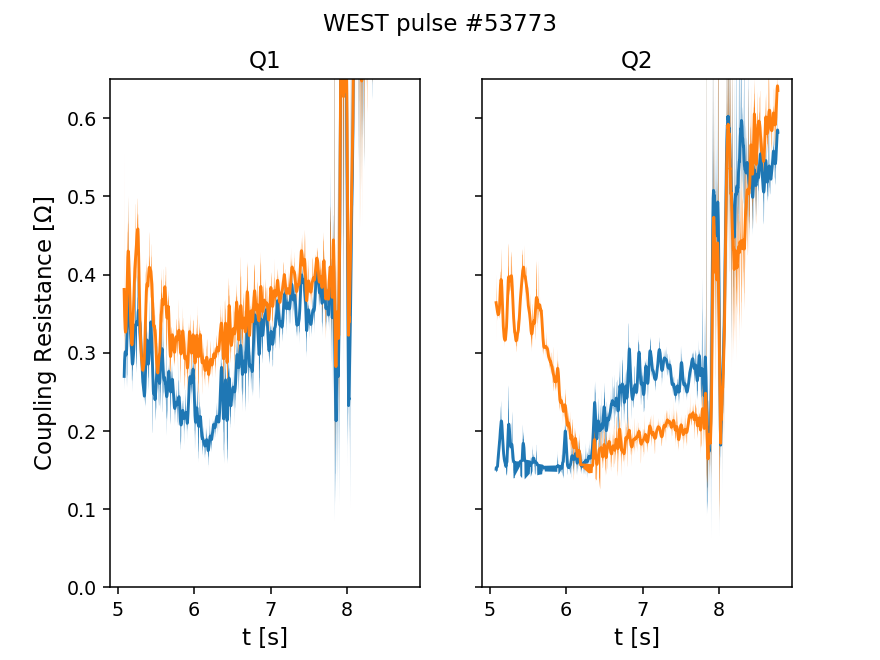

C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


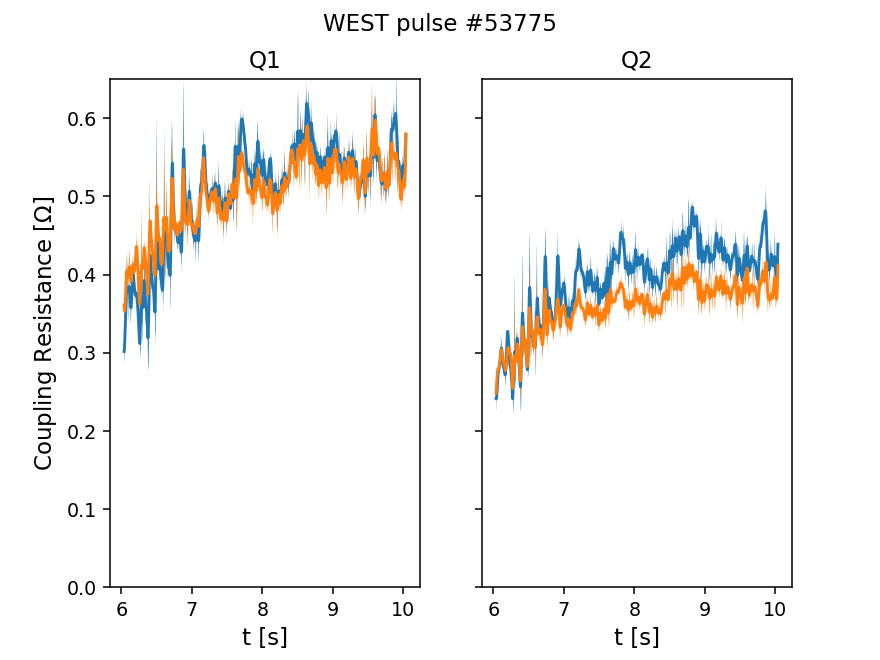

<IPython.core.display.Javascript object>


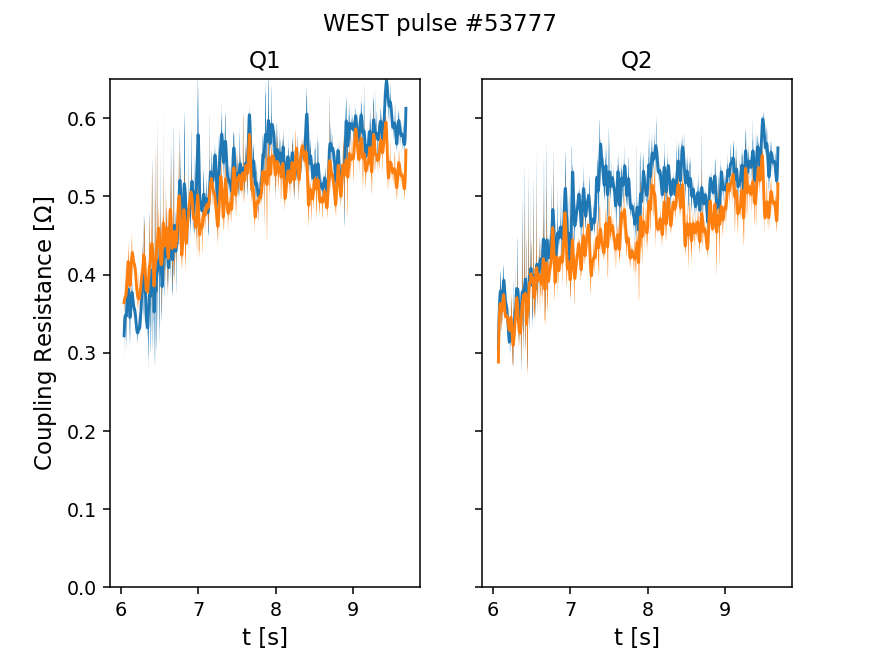

In [8]:
for pulse in [pulses[1], pulses[3], pulses[4]]:

    Rc_Q1_left, t_Q1_left = get_filtered_sig(pulse, signames['Rc_Q1_left'], thres_min=0.15, thres_max=2)
    Rc_Q1_right, t_Q1_right = get_filtered_sig(pulse, signames['Rc_Q1_right'], thres_min=0.15, thres_max=2)

    Rc_Q2_left, t_Q2_left = get_filtered_sig(pulse, signames['Rc_Q2_left'], thres_min=0.15, thres_max=2)
    Rc_Q2_right, t_Q2_right = get_filtered_sig(pulse, signames['Rc_Q2_right'], thres_min=0.15, thres_max=2)

    fig, ax = subplots(1, 2, sharey=True, sharex=True)
    ax[0].fill_between(t_Q1_left, 
                    Rc_Q1_left - (Rc_Q1_left - smooth(Rc_Q1_left)),
                    Rc_Q1_left + (Rc_Q1_left - smooth(Rc_Q1_left)) )
    ax[0].plot(t_Q1_left, smooth(Rc_Q1_left))

    ax[0].fill_between(t_Q1_right, 
                    Rc_Q1_right - (Rc_Q1_right - smooth(Rc_Q1_right)),
                    Rc_Q1_right + (Rc_Q1_right - smooth(Rc_Q1_right)) )
    ax[0].plot(t_Q1_right, smooth(Rc_Q1_right))
    fig.suptitle(f'WEST pulse #{pulse}', fontsize=12)
    ax[0].set_ylabel('Coupling Resistance [$\Omega$]', fontsize=12)
    ax[0].set_title('Q1', fontsize=12)
    ax[0].set_xlabel('t [s]', fontsize=12)

    ax[1].fill_between(t_Q2_left, 
                    Rc_Q2_left - (Rc_Q2_left - smooth(Rc_Q2_left)),
                    Rc_Q2_left + (Rc_Q2_left - smooth(Rc_Q2_left)) )
    ax[1].plot(t_Q2_left, smooth(Rc_Q2_left))

    ax[1].fill_between(t_Q2_right, 
                    Rc_Q2_right - (Rc_Q2_right - smooth(Rc_Q2_right)),
                    Rc_Q2_right + (Rc_Q2_right - smooth(Rc_Q2_right)) )
    ax[1].plot(t_Q2_right, smooth(Rc_Q2_right))
    ax[1].set_title('Q2', fontsize=12)
    ax[1].set_xlabel('t [s]', fontsize=12)
    ax[1].set_ylim(0, 0.65)


<IPython.core.display.Javascript object>


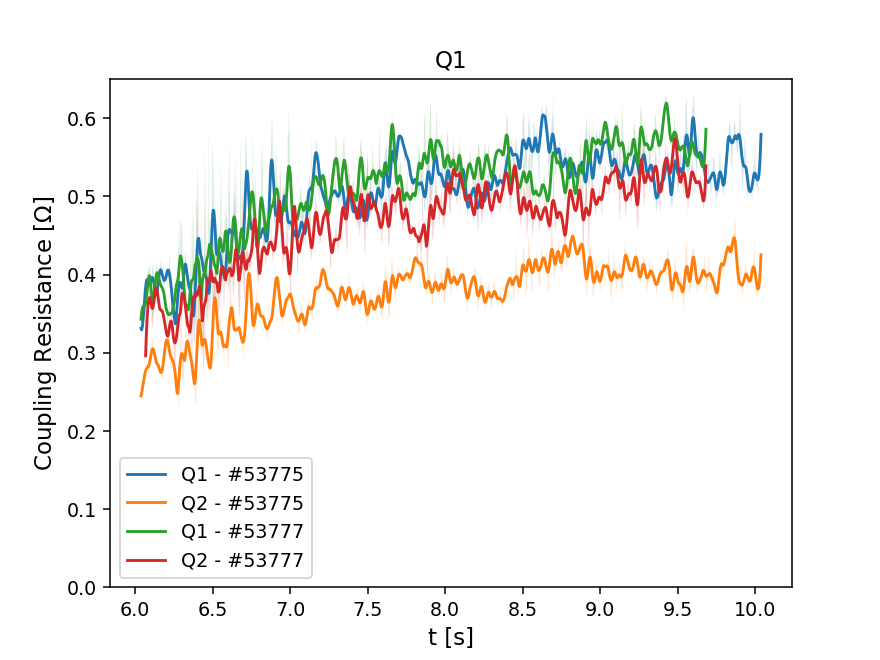

C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [9]:
fig, ax = subplots()
# average left/right Rc
for pulse in [pulses[3], pulses[4]]:

    Rc_Q1_left, t_Q1_left = get_filtered_sig(pulse, signames['Rc_Q1_left'], thres_min=0.15, thres_max=2)
    Rc_Q1_right, t_Q1_right = get_filtered_sig(pulse, signames['Rc_Q1_right'], thres_min=0.15, thres_max=2)
    Rc_Q1_right = interp(t_Q1_left, t_Q1_right, Rc_Q1_right)
    
    Rc_Q2_left, t_Q2_left = get_filtered_sig(pulse, signames['Rc_Q2_left'], thres_min=0.15, thres_max=2)
    Rc_Q2_right, t_Q2_right = get_filtered_sig(pulse, signames['Rc_Q2_right'], thres_min=0.15, thres_max=2)
    Rc_Q2_right = interp(t_Q2_left, t_Q2_right, Rc_Q2_right)
    
    Rc_Q1 =  mean(array([Rc_Q1_left, Rc_Q1_right]), axis=0)
    Rc_Q2 =  mean(array([Rc_Q2_left, Rc_Q2_right]), axis=0)
    

    
    ax.fill_between(t_Q1_left, 
                    Rc_Q1 - (Rc_Q1 - smooth(Rc_Q1)),
                    Rc_Q1 + (Rc_Q1 - smooth(Rc_Q1)), alpha=0.2 )
    ax.plot(t_Q1_left, smooth(Rc_Q1), label=f'Q1 - #{pulse}')



    ax.fill_between(t_Q2_left, 
                    Rc_Q2 - (Rc_Q2 - smooth(Rc_Q2)),
                    Rc_Q2 + (Rc_Q2 - smooth(Rc_Q2)), alpha=0.2 )
    ax.plot(t_Q2_left, smooth(Rc_Q2), label=f'Q2 - #{pulse}')

    ax.set_title(f'WEST pulse #{pulse}', fontsize=12)
    ax.set_ylabel('Coupling Resistance [$\Omega$]', fontsize=12)
    ax.set_title('Q1', fontsize=12)
    ax.set_xlabel('t [s]', fontsize=12)
    ax.legend()
    ax.set_ylim(0, 0.65)


In [10]:
 mean(array([Rc_Q1_left, Rc_Q1_right]), axis=0)

array([0.35350002, 0.33800002, 0.34100002, ..., 0.57300003, 0.57450003,
       0.57850003])

<IPython.core.display.Javascript object>


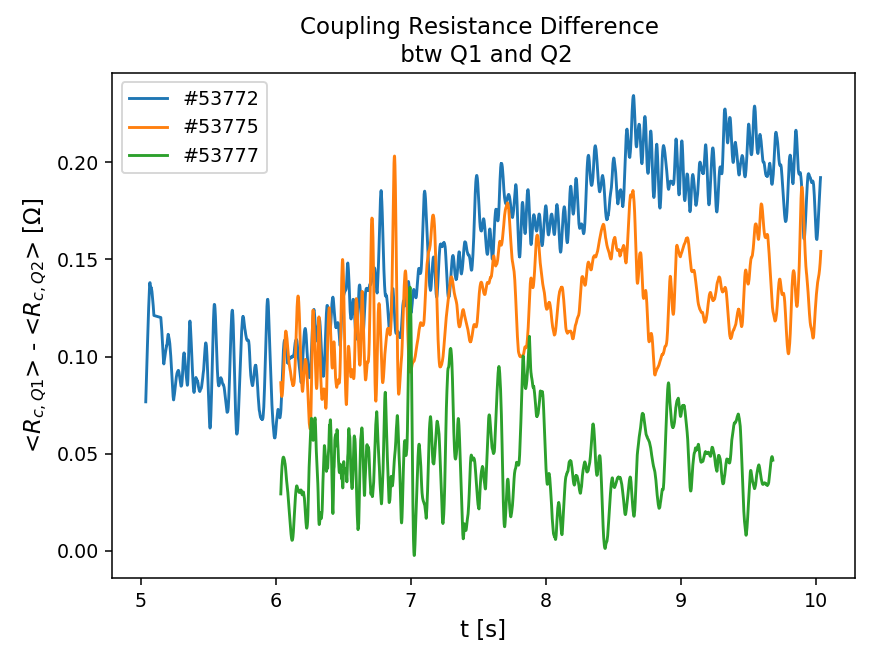

C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [12]:
fig, ax = subplots()
# difference of the average left/right Rc
for pulse in [pulses[0], pulses[3], pulses[4]]:

    Rc_Q1_left, t_Q1_left = get_filtered_sig(pulse, signames['Rc_Q1_left'], thres_min=0.15, thres_max=2)
    Rc_Q1_right, t_Q1_right = get_filtered_sig(pulse, signames['Rc_Q1_right'], thres_min=0.15, thres_max=2)
    Rc_Q1_right = interp(t_Q1_left, t_Q1_right, Rc_Q1_right)
    
    Rc_Q2_left, t_Q2_left = get_filtered_sig(pulse, signames['Rc_Q2_left'], thres_min=0.15, thres_max=2)
    Rc_Q2_right, t_Q2_right = get_filtered_sig(pulse, signames['Rc_Q2_right'], thres_min=0.15, thres_max=2)
    Rc_Q2_right = interp(t_Q2_left, t_Q2_right, Rc_Q2_right)
    
    
    Rc_Q1 =  mean(array([Rc_Q1_left, Rc_Q1_right]), axis=0)
    Rc_Q2 =  mean(array([Rc_Q2_left, Rc_Q2_right]), axis=0)
    Rc_Q2 = interp(t_Q1_left, t_Q2_left, Rc_Q2)
    

    ax.plot(t_Q1_left, smooth(abs(Rc_Q1 - Rc_Q2)), label=f'#{pulse}')

    ax.set_title('Coupling Resistance Difference \n btw Q1 and Q2', fontsize=12)
    ax.set_ylabel('<$R_{c,Q1}$> - <$R_{c,Q2}$> [$\Omega$]', fontsize=12)
    ax.set_xlabel('t [s]', fontsize=12)
    ax.legend()
    
fig.tight_layout()
fig.savefig('2018-11-27_coupling_resistance_differences.png')